<center><img src="./../data/besm.png" alt="In the name of Allah" width="150"></center>

<style>
    
@font-face {font-family: "B Lotus"; src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot"); src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot?#iefix") format("embedded-opentype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff2") format("woff2"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff") format("woff"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.ttf") format("truetype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.svg#B Lotus") format("svg"); }


</style>

<center style ='font-family: "B Lotus";'>تمرین اول - درس پردازش زبان‌های طبیعی</center>
<center style ='font-family: "B Lotus";'>ترم ۱۴۰۱۱ - دانشکده مهندسی کامپیوتر</center>
<hr>
<center style ='font-family: "B Lotus";'>محمدحسین موثقی‌نیا</center>
<center style ='font-family: "B Lotus";'>۴۰۰۲۰۰۹۱۹</center>
<hr>

<div style="direction:rtl">نصب و فراخوانی کتابخانه‌های مورد نیاز:</div>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm
!pip install hazm
!pip install wordcloud_fa

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
from wordcloud_fa import WordCloudFa
from __future__ import unicode_literals
import hazm
import random

<div style="direction:rtl">تعریف الفباهای مورد نیاز، شامل موارد:</div>
<ul style="direction:rtl;">
  <li>الفبای زبان فارسی</li>
  <li>علائم سجاوندی</li>
  <li>اعداد فارسی و انگلیسی</li>
  <li>لیست ایموجی&zwnj;ها &laquo;از این <a href="https://gist.github.com/bfeldman89/fb25ddb63bdaa6de6ab7ac946acde96f" rel="noopener noreferrer" target="_blank">لینک</a> استفاده شده است&raquo;</li>
</ul> 

In [2]:
persian_alphabet = ["آ","ا","ب","پ","ت","س","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","ل","م","ن","و","ه","ی"]
decorativeـsigns = [" ", ",", ":", "؛", "|", "\\", "*", " ", "٬", "!", "؟", "?", "(", ")", ".", "،"]
persian_numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] 
english_numbers = ["۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]
emojis_df = pd.read_csv("./../data/emojis.csv", names=["emoji", "desciption"])
emoji_alphabet = emojis_df.emoji.to_numpy()
emojis_df.head()

,emoji,desciption
0,😀,Grinning Face
1,😁,Beaming Face With Smiling Eyes
2,😂,Face With Tears of Joy
3,🤣,Rolling on the Floor Laughing
4,😃,Grinning Face With Big Eyes


<div style="direction:rtl;">در این مرحله یک پیش&zwnj;پردازش اولیه انجام می&zwnj;شود:</div>
<ul style="direction:rtl;">
  <li>حذف <code>n\</code> های اضافه متن که منجر به اضافه شدن خطوط شده است</li>
  <li>حذف مواردی که به دلیل اشتباه تایپی یا ... tab زده شده است و به دلیل این که در فایل به عنوان delimiter از tab استفاده شده است، این موارد را با یک tab جایگزین می کنیم.</li>
</ul> 

In [3]:
def check_file_and_extract_data(num):
    f = open(f'./../result/comments_{num}.txt', 'r')
    text = f.readlines()
    f.close()

    text = [x.replace('\n', '').replace('\t\t', '\t').split('\t') for x in text]

    i = 0
    while i < len(text):
        if len(text[i]) == 2:
            i += 1
            text[i-1].append(text[i])
            text[i] = []
        i += 1

    while [] in text:
        text.remove([])
    
    for i, x in enumerate(text):
        if len(x) != 3 and x != []:
            print(f'ERROR [{i}]')
    return text

In [4]:
data = []
for i in range(1,4):
    data.extend(check_file_and_extract_data(i))

comments_data = [c[2] for c in data]
print(f'Comments number: {len(data)}')

Comments number: 708934


<div style="direction:rtl;">تابع <code>get_comments_with_emoji</code> لیستی از کامنت&zwnj;ها را دریافت می کند و در خروجی کامنت&zwnj;هایی را بر می&zwnj;گرداند که حتما دارای حداقل یک <strong>ایموجی</strong> باشند.</div>
<div style="direction:rtl;">برای این منظور، بررسی می&zwnj;کند که آیا هرکدام از الفبای ایموجی موجود حداقل یکبار در متن وجود داشته است یا خیر. در صورت وجود آن را به لیست اضافه می کند.</div>

In [5]:
def get_comments_with_emoji(comments):
    comment_texts = []
    for comment in comments:
        for emoji in emoji_alphabet:
            if type(comment) == str:
                if emoji in comment:
                    comment_texts.append(comment)
                    break
    return comment_texts

<div style="direction:rtl;">به کمک تابع <code>get_comments_with_emoji</code> کامنت هایی که دارای ایموجی هستند را استخراج می‌کنیم و در نهایت در فایل <code>comments_with_emoji.txt</code> ذخیره می کنیم. </div>

In [6]:
comments_with_emoji = get_comments_with_emoji(comments_data)

f = open("./../result/comments_with_emoji.txt", "w")
for comment in comments_with_emoji:
    f.write(f"{comment}\n")
f.close()

len(comments_with_emoji)

90873

<div style="direction:rtl;">این تابع به منظور استخراج مقادیری از دیکشنری ورودی است که بزرگتر از مقدار <code>value</code> باشند.</div>

In [7]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

<div style="direction:rtl;">تابع نمایش چند مورد اول لیست</div>

In [8]:
def head_list(lst, until=5, sep=' '):
    '''
    Print top "until" item of list, "sep" is the seperator of printing results
    '''
    result = ''
    num = 0
    for i in lst:
        if num == until:
            result += f'{i}'
        else:
            result += f'{i}{sep}'
        num += 1
        if num > until:
            break
    print(result)

<div style="direction:rtl;">یک دیکشنری از ایموجی ها ساخته و تعداد هرکدام را در آن ذخیره می‌کنیم و در نهایت یک مرتب سازی براساس تعداد انجام می دهیم.</div>
<div style="direction:rtl;">در زمان شمارش، برای هر خط درصورتی که چندبار از یک ایموجی استفاده شده باشد، آن ایموجی فقط یکبار در شمارش به حساب خواهد آمد.</div>

In [9]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in comments_with_emoji:
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)

In [10]:
top_num_to_show = 20

print(f'Top {top_num_to_show} emojis in texts:\n #\tEmoji\tNumber')

i = 0
for k in emoji_dict.keys():
    print(f'{i:2d}\t{k}\t{emoji_dict[k]}')
    i += 1
    if i >= 20:
        break

print('---------------------')
print(f"The percentage of emojis in the text compared to the total emojis: \
[{int(len(emoji_dict_nonzero)/len(emoji_dict)*10000)/100}%]")

Top 20 emojis in texts:
 #	Emoji	Number
 0	😍	17335
 1	❤	14646
 2	👌	12692
 3	👍	9942
 4	😂	6895
 5	😘	4838
 6	👏	4400
 7	🤩	3413
 8	🤣	3017
 9	♥	2912
10	🌹	2441
11	😭	2334
12	😊	2122
13	🙏	2095
14	💜	1872
15	💙	1769
16	😁	1599
17	💖	1547
18	😅	1119
19	😐	1118
---------------------
The percentage of emojis in the text compared to the total emojis: [49.6%]


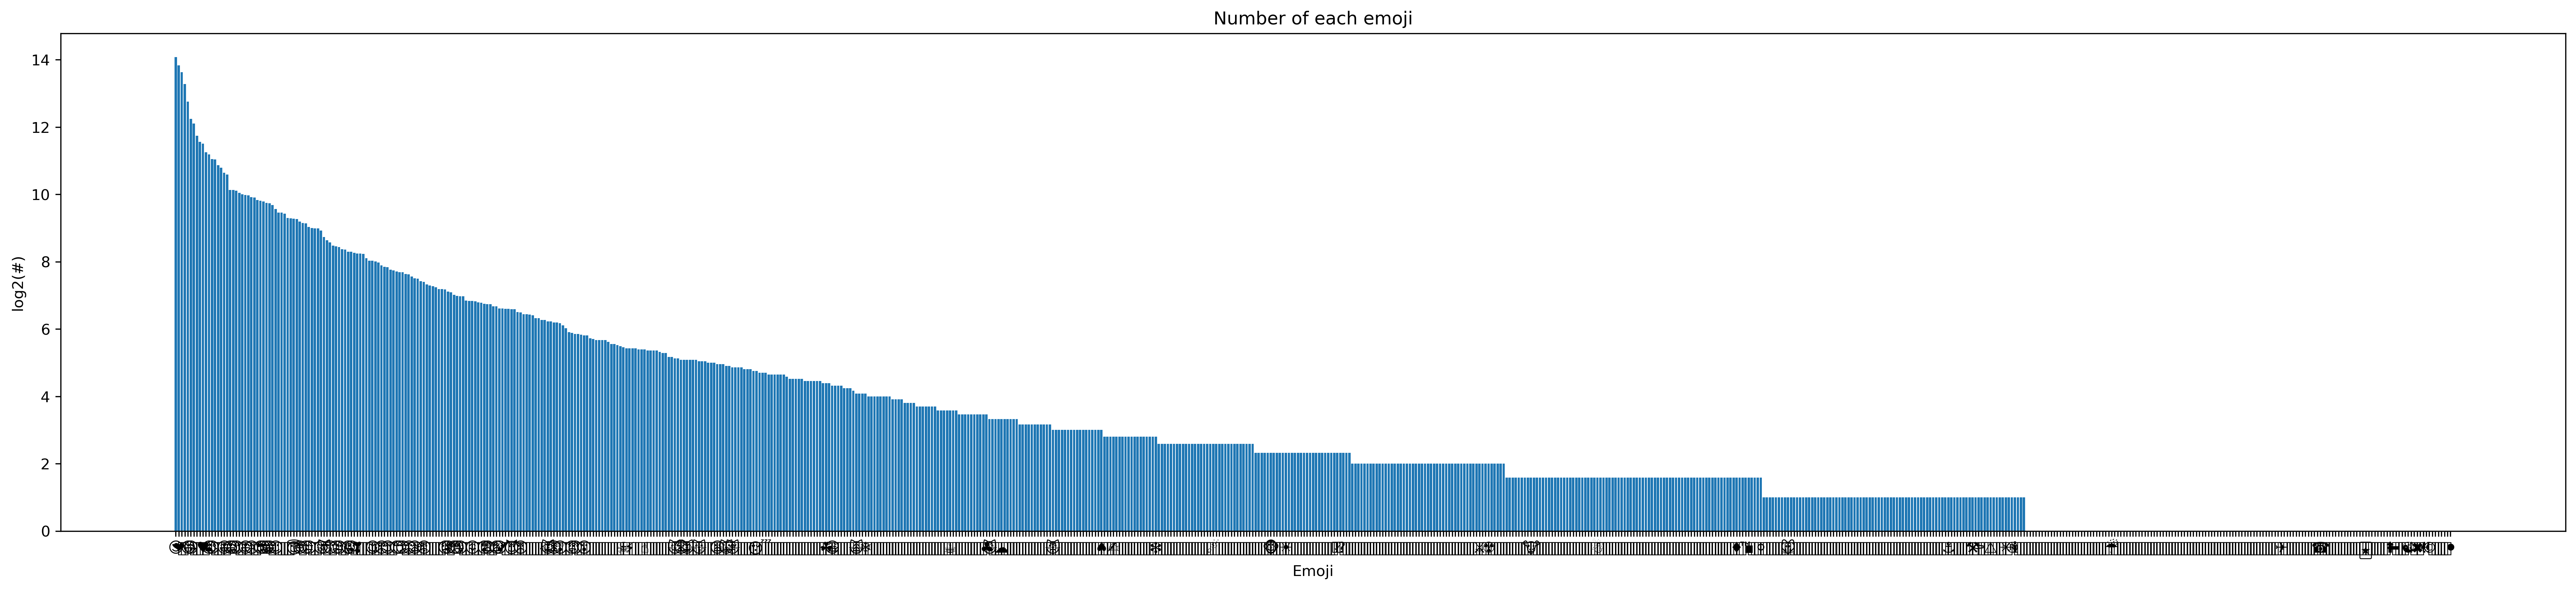

In [12]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

<h2 style='direction:rtl;font-family: "B Lotus";'>§ نرمال‌سازی</h2>

<div style='direction:rtl;font-family: "Lotus";'>یک کلاس مجزا تعریف شده است که از کلاس <code>Normalizer</code> کتابخانه <code>hazm</code> ارث بری می&zwnj;کند. در این کلاس توابع زیر اضافه شده&zwnj;اند:</div>
<ul style='direction:rtl;font-family: "Lotus";'>
  <li>تابع <code>__init__</code> صرفا به این منظور بازنویسی شده است که تابع <code>aug_data_init</code> را صدا بزند تا محتوای فایل مورد نیاز در متغیرها ذخیره شود. همچنین الفباهای مورد نیاز را مقدار دهی می کند.</li>
  <li>تابع <code>aug_data_init</code> فایلی را می&zwnj;خواند و در یک دیکشنری ذخیره می&zwnj;کند. این فایل غلط های متداولی که در متن وجود داشته است را در خود دارد و شکل صحیح آن را نوشته است و دیکشنری ساخته شده برهمین اساس می&zwnj;باشد.</li>
    <li>تابع <code>add_space_between_emoji_and_text</code> به منظور ایجاد فاصله میان متن و ایموجی‌ها می‌باشد.</li>
  <li>تابع <code>my_normalizer</code> ابتدا خود تابع <code>normalize</code> مربوط به کتابخانه <code>hazm</code> را صدا می کند و خروجی آن را گرفته و تغییرات لازم را متناسب با دیکشنری ای که توسط تابع <code>aug_data_init</code> مقدار دهی شده است را اعمال می&zwnj;کند تا این خطاها نیز رفع شود.</li>
</ul>

In [13]:
class MyNormalizer(hazm.Normalizer):
    
    def __init__(self, persian_alphabet, emoji_alphabet):
        super().__init__()
        self.aug_data_init()
        self.persian_alphabet = persian_alphabet
        self.emoji_alphabet = emoji_alphabet
        
    def aug_data_init(self):
        f = open('./../data/augmented_data.txt', 'r')
        self.aug_data = f.readlines()
        f.close()
    
    def add_space_between_emoji_and_text(self, sent):
        res_sent = ''
        for i in range(len(sent)):
            if i+1 < len(sent):
                if (sent[i] in self.persian_alphabet and sent[i+1] in self.emoji_alphabet) or \
                    (sent[i] in self.emoji_alphabet and sent[i+1] in self.persian_alphabet):
                    res_sent += sent[i] + ' '
                else:
                    res_sent += sent[i]
            else:
                res_sent += sent[i]
        return res_sent
        
    def my_normalizer(self, text):
        text = self.normalize(text)
        text = self.add_space_between_emoji_and_text(text)
        
        aug = {y[0]:y[1] for y in [x.replace('\n', '').split('\t') for x in self.aug_data]}

        for k in aug:
            while k in text:
                text = text.replace(k, aug[k])
        return text

In [14]:
normalizer = MyNormalizer(persian_alphabet, emoji_alphabet)

In [15]:
test_set = ["واقعااااا", "عاااالییییی", "عالیهههه", 'خداروششششکر', 'دم سازندش گرم😊', 'وانیامم🥳🥳👏']
for i, t in enumerate(test_set):
    print(f'{i+1}\tBefore: {t}\t\tAfter: {normalizer.my_normalizer(t)}')

1	Before: واقعااااا		After: واقعا
2	Before: عاااالییییی		After: عالی
3	Before: عالیهههه		After: عالیه
4	Before: خداروششششکر		After: خداروشکر
5	Before: دم سازندش گرم😊		After: دم سازندش گرم 😊
6	Before: وانیامم🥳🥳👏		After: وانیامم 🥳🥳👏


<div style='direction:rtl;font-family: "Lotus";'>پیش پردازش اولیه متن:</div>
<ul style='direction:rtl;font-family: "Lotus";'>
  <li>حذف <code>n\</code> ها</li>
  <li>حذف <code>space</code> های اضافه ابتدا و انتهای متن</li>
  <li>شکستن متن از نقاط دارای <code>space</code></li>
  <li>فقط کامنت‌های انتخاب می‌شوند که حتما متن فارسی نیز داشته باشند</li>
</ul>  

In [23]:
comments = []
for comment in tqdm(comments_with_emoji):
    for c in persian_alphabet:
        if c in comment:
            comments.append(comment.replace("&#039;", "\'").replace('\n', '').strip().split())
            break

print(f"Comments number: {len(comments)}")
head_list(comments, sep='\n')

100%|█████████████████████████████████████████████████████████████████████████| 90873/90873 [00:00<00:00, 241987.37it/s]

Comments number: 86365
['توی', '۸', 'ساعت', 'مهلت', 'فیلم', '۲', 'بار', 'این', 'فیلم', 'بی', 'نظیر', 'را', 'دیدم،', 'واقعیت', 'جامعه', 'و', 'واقعا', 'و', 'به', 'شدت', 'با', 'احساساتم', 'بازی', 'شد،', 'حتما', 'پیشنهاد', 'میکنم.', 'کاش', 'بیشتر', 'از', 'این', 'فیلم', 'حمایت', 'میشد.', 'با', 'فیلم', 'های', 'هالیوودی', 'برابری', 'میکرد🤣🤣🤣']
['ارزش', 'دیدن', 'داره👌']
['پسندیدم', '👍']
['عااااااااالی', 'بود', '.', 'با', 'بازی', 'آقای', 'درخشانی', 'عزیز', 'عالی', 'ترم', 'شد', '.', 'خیلی', 'قشنگ', 'بود.لذت', 'بردم.👏👏👏']
['خیلی', 'خوب', 'بود👌👌']
['خوب', 'بود', '👏❤']


<div style='direction:rtl;font-family: "Lotus";'>نرمال‌سازی به کمک تابع <code>my_normalizer</code> انجام می شود که شامل بخش‌های زیر می‌باشد:</div>
<ul style='direction:rtl;font-family: "Lotus";'>
  <li>اجرای تابع <code>normalizer</code> کتابخانه <code>hazm</code></li>
  <li>با استفاده از تابع <code>add_space_between_emoji_and_text</code> در مواردی که بین متن و ایموجی فاصله‌ای وجود ندارد، فاصله ایجاد می کند.</li>
  <li>بعضی از اشتباهات یا حالت‌هایی که در متن به صورت محاوره‌ای استفاده می‌شود، اصلاح می‌شود.</li>
</ul>  

In [24]:
comments_normalized = [[normalizer.my_normalizer(y) for y in x] for x in tqdm(comments)]

100%|███████████████████████████████████████████████████████████████████████████| 86365/86365 [01:11<00:00, 1201.14it/s]


In [25]:
for x in random.sample(comments_normalized, 50):
    print(' '.join(x))

امیدوارم خوب باشه 😅
جالب بود 👌👌👌
عالی هست ممنون از آقای بهرنگ توفیقی 🤩🤩
عالی بود 👍
من اول فک کردم کارتون قشنگی نیست ولی الان دیدم و عاشقش شدم خیلی کارتون عالی بود حتما حتما ببینید خیلی قشنگه 😍😍😍😍
حضرت عباسی عالی بود خیلی خوب ساختن بعیده 😁 پیشنهاد میکنم ببنید این فیلمو خیلی فوق العاده است
واقعیت الان برخی جوان های امروز رو به تصویر کشید . خوبه که از فیلم درس بگیرند و ببیند آخرش چی میشه 🙂🙃
خیلی ترسناک هست 😵😵😵☠️
عالی،، 👍👍👍👍
بد نبود 🤭🤩😘😁😘🤩🤩😄😃🤩🤩😗☺😍😗🤩😜☺😜
نابغه ها خو وقتی فیلم میاد میتون نظر بدن و بگن عالیه 😐 من شمارو درک نمیکنم خدایی: /
لحظه شماری میکنیم واسه اومدن قسمت دو 😂🥺😍
خیلی عالی بود 😍😍 مخصوصا منی که اول بازیشو کرده بودم الان فیلمش چند برابر برام قشنگ تر شده
خیلی ها این فیلم رو به خاطر امیر حسین آرمان میبین جذاب 😍
فیلمه خیلی قشنگیه 👌👌👌👌
حرف نداشت 🧡
بهترین فیلمی که تو عمرم دیدم خیلی عالی و جذاب پیشنهاد می کنم آب دستون بزارید زمین این فیلم رو ببینید 😍
تشکر می کنم از فیلیمو که حد اقل تریلر فیلمو سانسور نکرده 😄
معرکه بود ❤❤❤❤❤❤❤❤❤
عالی بود 👏🏻
خیلی قشنگ بود ولی ایکاش دوبله نمی شد  …🌹🌹🌹🌹
ما

<h2 style='direction:rtl;font-family: "B Lotus";'>§ جمله‌بندی</h2>

In [26]:
comments_sentences = [hazm.sent_tokenize(' '.join(x)) for x in tqdm(comments_normalized)]

100%|█████████████████████████████████████████████████████████████████████████| 86365/86365 [00:00<00:00, 392511.13it/s]


In [29]:
for x in random.sample(comments_sentences, 50):
    print(' ### '.join(x))

🤩🤩🤩 عالی بود میشه ۴ رو هم بسازید ممنون
خیلی خوب بود یعنی من توی عمرم انقدر نخندیده بودم 😅😅
عالی عالی 👌
واقعا عالی بود ❤ محشر بود
من هزار بار ببینم خسته نمیشم.. ### فوق العادس 👌
تیزرش یه جوری بود نمی‌دونم چرا حس می کنم ملکه گدایان نمیشه با اینا مقایسه کرد اون یچی دیگه بود 😐😍 تیزرش شبیه سنفونی نهم بی روح و بی حس و حال یه فیلم مسخره حالا شاید خوب باشه من که فقط بخاطر فرزاد فرزین یعنی آهنگش می خوام ببینم برقیه پچیزی مهم نی
عالی بود دمتون گرم🥰😍
فوق العاده ، خانم صامتی با اختلاف بهترین بازیگر زن ایران 😍
خیلی غمگینه اعصابم خورد شد 😭
خیلی فیلم قشنگی بود 👌🏼
من رفتم سینما دیدم مردم از خنده ممنونم از سازنده و بازیگر های حرفه ای 😂🤣🤗
عالی بود 😘😘😘😘💯💯💯⁦♥️⁩⁦♥️⁩⁦♥️⁩😍😍😍😍
فیلم خیلی عالی بود حتما ببینید 😍😍😍🤩🤩🤩🤩
عالی بود 👏🏻👏🏻👏🏻⚘⚘⚘
بی صبرانه منتظر قسمت های جدید بی گناه هستم. ### برای قسمت اول فوق العاده بود. ### 😍
آقای فرزاد فرزین یکتاست هم صداش عالیه ❤ هم بازیگریش 💙💌 من یکی از طرف داره ویژه فرزاد جون هستم 💌💞 مثل همیشه عالی 💞
خیلی مزخرف بود حیف اینترنت 😐
خیلی کارتون عالی و قشنگ بود 😍😍❤❤❤❤
خیلی قشنگه 😅😅😅
من 

<h2 style='direction:rtl;font-family: "B Lotus";'>§ توکنیزیشن</h2>

In [30]:
comments_tokens = [[hazm.word_tokenize(sent) for sent in sents] for sents in tqdm(comments_sentences)]

100%|█████████████████████████████████████████████████████████████████████████| 86365/86365 [00:00<00:00, 139561.49it/s]


In [31]:
for x in random.sample(comments_tokens, 50):
    print(x)

[['بسیار', 'آموزنده', 'و', 'زیبا', 'بود', '.'], ['پیشنهاد', 'میکنم', 'که', 'ببینید', '❤']]
[['این', 'بهترین', 'و', 'زیبا', 'ترین', 'فیلمی', 'هست', 'که', 'من', 'دید', 'عالی', 'عالی', 'عالی', '👌👌👌👍👍👍']]
[['خیلی', 'فیلم', 'عالی', 'بود', '😍😍😍']]
[['من', 'که', 'خوشم', 'نیومد', 'چی', 'بود', 'بابامن', 'به', 'امید', 'اینکه', 'دارکساید', 'میاد', 'باهاشون', 'میجنگه', '۴', 'ساعت', 'وقت', 'گذاشتم', 'دیدم', '.'], ['حیف', 'وقت', '😒']]
[['واقعا', 'فیلم', 'عالیه', '😍']]
[['خیلی', 'عالی', 'بود', '😁']]
[['بسیار', 'عالی', '😍']]
[['عالی', 'سریالش', 'پشنهاد', 'میکنم', 'ببینید', '👍👍']]
[['خوب', 'بود', '👌👌👌']]
[['حرف', 'نداره', '✌🏼']]
[['این', 'فیلم', 'پر', 'از', 'معنا', 'و', 'مفهوم', 'بود', 'و', 'خیلی', 'جذاب', '❤️👍😉']]
[['واقعا', 'عالی', 'بود', '💋💋💋💋💋💋💋💋💋💋👄👄👄👄👄👄👄👄👄👄❤❤❤❤❤❤❤❤❤❤😚😚😚😚😚😚😚😚😚😚😍😍😍😍😍😍😍😍😍😍']]
[['قشنگ', 'بود', '👍👍👍👍👍👍']]
[['خیلی', 'عالی', 'و', 'با', 'حال', 'بوده', '💯']]
[['بسیار', 'عالی', 'و', 'زیبا', '👌']]
[['نگاه', 'های', 'احسان', 'به', 'نیلوفر', '…', '.'], ['چقدر', 'هنرمندی', 'تو', 'جواد', 'عزتی', 

<h2 style='direction:rtl;font-family: "B Lotus";'>§ تحیلی بسامد</h2>

In [47]:
from nltk import FreqDist
import itertools
import pandas as pd

tokens = list(itertools.chain(*itertools.chain(*comments_tokens)))

dataframe = {}

data = FreqDist(tokens).most_common(50)
     

freq_analysis = pd.DataFrame(data, columns=['token', 'freq'])  
freq_analysis

,token,freq
0,عالی,43377
1,بود,43027
2,خیلی,28972
3,و,15170
4,فیلم,14350
5,این,10258
6,که,9434
7,از,8986
8,من,8609
9,.,8082


In [50]:
print ('%-16s' % 'Number of words', '%-16s' % len(tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(tokens)))
avg=np.sum([len(word) for word in tokens])/len(tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % tokens[np.argmax([len(word) for word in tokens])])

Number of words  715203          
Number of unique words 41106           
Average word length 3.9047165629898086
Longest word     💞💞💖💖💖💖💖❤❤💚💚💚💜💗💗💜💚❤💖💖💞💞💖❤💜💜💜💜💜💗💗💗💜💚❤💖💞💞💞❤💚💚💜💗💗💗💗💜💜💜💜💗💗💚❤💞💞💞💖💍💖😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😘😘😘😘😘😘😘😘😘😘😘⭐⭐⭐⭐⭐⭐🌠🌠💘💘🌠🌠🌠⭐⭐⭐💜💜💗💗😂💗🌠🌠💘💘😘💍💍💍😘💍💍⭐⭐🌠🌠💘💘💘🌠🌠⭐💍💍❤😘❤😘❤❤😘😘❤😘💍❤❤💚💚💚💜💜💗💗💗💗😂😂💘💘💘💘💘💘💘💕💕💕💕💕💕💕💕💕💕💕💞💞💞💘💘💘💞💞💞💞💘💞💞💞💚💚💜💜💖💖💖💖💞💞💞💞💞💞💘💘💘💞💞💖💖💚💚💜💚❤❤❤❤❤❤💗💗💗💗💓💓💕💕💕💕💓💓💓💓💕💕💕💓💓💓💓💓💕💕💕💕💕💕💕💕⭐⭐🌠🌠⭐⭐🌠🌠⭐⭐🌠⭐⭐⭐⭐⭐🌠🌠🌠⭐⭐🌠🌠🌠🌠🌠🌠🌠🌠🌠⭐⭐🌠🌠🌠🌠💚💚❤💗💓💕⭐🌠🌠🌠🌠🌠⭐⭐💓💗💚💚❤💓💓⭐🌠🌠🌠💜💜💜⭐⭐⭐⭐🌠💜💜🌠💖⭐⭐⭐💕💞💕💕💖💕💘💘💓💓😂😂💗💗💓💘💘😂💗💗❤💚💚😘😘😘💍😂💘💖😘😘😘💍😂💘💞💖💜💖💖😍😍😍💖💖💖💓💗😘😘😘💚💚💗💘💞💞💕💞💞💖💜💜💖💕💍💍😘😂💕⭐💜💜💜💜💕💘💍💍💚💚😘😘😘💚😂💞💖💜💜💜🌠🌠🌠💜💜⭐⭐💖💖💖💞💖💘❤💚💍😘💚😘💚😘❤❤😂💘💞💘💞💞💖💞💘😂💘💘😂💍😂😂😂😂😂😂❤💍❤❤😘💚💚💚😘💚❤❤❤💗💓💓💕💕⭐⭐🌠🌠💜💜💜💖💖💞😂😘😘😘😂💘💜💜💜🌠🌠⭐⭐💓💗💗❤💚😘😂😂💘💞💞💖🌠⭐💕💕💓💗❤💚💚💗💓💕💕⭐💖💜💜💖💞😂😂😂💍😘😘😘😂❤❤💓💕💖💞😂😂😘😘💗💗💓💞💜💖💜💘💖💗💘💘❤💘❤💚💗❤💍💓💗💕💗⭐💞💜💖💜💕⭐💓💓❤💗💚⭐💓⭐💜💘⭐💘💕💘❤💘❤💚❤💚😂💚💘💍💞💗💖💕💜💕💖💓💕💗💘❤💚💗😘💗😂💍💞😂💘💖💜💕💜💕💖💓💘😂😘😂😘😂💞😂💕💜💖💓💞💓💓❤💗💚💍💓💘💖💞😂😂😘😂💞💖💓💜💞💖💘😂💞😂💍💍😘😂😂💞💜💞💜💖⭐💗💕💗💕💗💓❤💗💚💗❤💕💗💓⭐⭐💕💕🌠💕⭐⭐💓💓💗💓❤❤💓💓😂💖💘💜💞💜💕💓⭐💞💗❤💘💚💗❤💗😂❤💓❤❤💓💘❤💘💗💘💗💘❤💘❤❤💘💘❤💍💘💍💘💘💍💍💘💍💘💗❤💞💗💖💓💕💖💜💕💕💖💞💗😂💍😘💍💚💗❤💗💕💗💓⭐💜💕💕💖💞😂💍😂😘💍💍💘💞😂💞😂💞💗💗💕💓⭐💖💕💜💞😈💞💓💖💞💗💘💗💘💗💞💗💓💞💓💗💞💗💞💗💕💕💗💘💞💗💞💗💕💗💞💞💕💗💗💕💗💕💕💗💗💓💗💓💓💓💗💕💗💓⭐⭐💕🌠💕⭐🌠🌠⭐🌠

In [ ]:
wordcloud = WordCloudFa(persian_normalize=True, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
image.show()

In [5]:
movies = pd.read_csv("./../result/movies.txt", names=["genre", "url"], delimiter='\t')
movies

,genre,url
0,drama,https://www.filimo.com/m/0v9if
1,drama,https://www.filimo.com/m/i3uga
2,drama,https://www.filimo.com/m/p8yhg
3,drama,https://www.filimo.com/m/vsucQ
4,drama,https://www.filimo.com/m/6lx40
...,...,...
4938,theatre,https://www.filimo.com/m/y078s
4939,theatre,https://www.filimo.com/m/0yiac
4940,theatre,https://www.filimo.com/m/ildr4
4941,theatre,https://www.filimo.com/m/eqwkc


In [6]:
genres = ["drama", "war", "adventure", "sci-fi", "romance", 
          "horror", "mystery", "family", "musical", "talk-show", 
          "short", "reality-tv", "history", "action", "fantasy", 
          "comedy", "western", "crime", "thriller", "sport", 
          "documentary", "music", "religious", "concert", 
          "biography", "theatre"]

num = {}
for m in genres:
    num[m] = 0
for m in movies["genre"]:
    num[m] += 1
num

{'drama': 752,
 'war': 82,
 'adventure': 483,
 'sci-fi': 113,
 'romance': 150,
 'horror': 200,
 'mystery': 165,
 'family': 234,
 'musical': 49,
 'talk-show': 70,
 'short': 152,
 'reality-tv': 35,
 'history': 111,
 'action': 569,
 'fantasy': 118,
 'comedy': 415,
 'western': 28,
 'crime': 381,
 'thriller': 236,
 'sport': 50,
 'documentary': 228,
 'music': 30,
 'religious': 42,
 'concert': 18,
 'biography': 208,
 'theatre': 24}

In [17]:
num['drama'] + num['war'] + num['adventure'] + num['sci-fi'] + num['romance'] \
+ num['horror'] + num['mystery'] + num['family'] + num['musical'] + num['talk-show'] \
+ num['short'] + num['reality-tv'] + num['history'] + num['action'] + num['fantasy'] \
+ num['comedy'] + num['western'] + num['crime'] + num['thriller'] + + num['sport'] \
+ num['documentary']


4621